# setup

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os 

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/drive/My Drive/"

# choose where you want your project files to be saved
project_folder = "thesis/collab notebooks and external code/source"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  !touch 'new_file_in_working_directory.txt'
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

create_and_set_working_directory(project_folder)


Your working directory was changed to /content/drive/My Drive/thesis/collab notebooks and external code/source

An empty text file was created there. You can also run !pwd to confirm the current working directory.


In [4]:
!pip install xport

In [5]:
#NAIMAN'S ORIGINAL CODE
# create dictionary of data frames indexed by file names
#
import re
import os
import xport #
import pandas as pd
import numpy as np

L=os.listdir()
L=[x for x in L if re.search("_H.XPT",x)]
df={}
fnames=[]
for x in L:
    #print(x)
    with open(x,"rb") as fin:
        y=x.replace(".XPT","")
        dt=xport.to_dataframe(fin)
        if 'SEQN' in dt.columns:
            fnames.append(x.replace(".XPT",""))
            df[y]=dt
print(len(fnames))

17


#Creating LC comment files for CUSEZN_H (Copper, Selenium & Zinc - Serum) where everything is detect for everyone

In [6]:
df['CUSEZN_H'].head()

,SEQN,WTSA2YR,LBXSCU,LBDSCUSI,LBXSSE,LBDSSESI,LBXSZN,LBDSZNSI,URXUCR
0,73560.0,183653.604036,122.0,19.15,112.2,1.42,79.9,12.22,76.0
1,73564.0,194847.483347,128.0,20.10,131.2,1.67,81.0,12.39,242.0
2,73567.0,100284.090673,128.6,20.19,114.0,1.45,73.2,11.20,215.0
3,73583.0,163017.304491,NaN,NaN,NaN,NaN,NaN,NaN,151.0
4,73585.0,55880.049721,86.1,13.52,114.5,1.45,89.8,13.74,100.0


In [7]:
df['CUSEZN_H']['LBDSCULC']=0
df['CUSEZN_H']['LBDSSELC']=0
df['CUSEZN_H']['LBDSZNLC']=0
df['CUSEZN_H']['URDUCRLC']=0

#making a dictionary of all comment codes for detection. (0 means at or above detection limit, 1 means below)

# d_p_dropna = dictionary of detect percent, omitting the Nan values

In [8]:
#df['AMDGYD_H']
#print(fnames)
d_p = {}
d_p_dropna = {}
for name in fnames:
  # for each chemical , create df with only 'LC' cols
  n = df[name].loc[:,df[name].columns.str.endswith('LC')]
  # get percentage 
  for column in n:
    p = round(((n[column][n[column]==0].count())/len(n))*100,2)
    d_p[column] = p
    p_dropna = round(((n[column][n[column]==0].count())/len(n[column].dropna()))*100,2)
    d_p_dropna[column] = p_dropna


In [9]:
#removing what is not a comment code, but just ends with 'LC'
d_p.pop("URXTLC")
d_p_dropna.pop("URXTLC")

0.0

In [10]:
d_p_dropna

{'LBD2DFLC': 18.39,
 'LBD4CELC': 0.0,
 'LBDACRLC': 100.0,
 'LBDBCDLC': 71.01,
 'LBDBGELC': 0.83,
 'LBDBGMLC': 74.49,
 'LBDBMNLC': 100.0,
 'LBDBPBLC': 100.0,
 'LBDBSELC': 100.0,
 'LBDEOALC': 96.5,
 'LBDFORLC': 100.0,
 'LBDGLYLC': 100.0,
 'LBDIHGLC': 17.39,
 'LBDPFLLC': 86.75,
 'LBDSCULC': 100.0,
 'LBDSSELC': 100.0,
 'LBDSZNLC': 100.0,
 'LBDTHGLC': 74.32,
 'LBDV06LC': 2.22,
 'LBDV07LC': 1.87,
 'LBDV08LC': 1.22,
 'LBDV1DLC': 0.0,
 'LBDV2ALC': 1.5,
 'LBDV3BLC': 0.0,
 'LBDV4CLC': 7.47,
 'LBDVBFLC': 5.48,
 'LBDVBMLC': 12.09,
 'LBDVBZLC': 24.98,
 'LBDVC6LC': 1.7,
 'LBDVCBLC': 0.03,
 'LBDVCFLC': 48.92,
 'LBDVCMLC': 10.39,
 'LBDVCTLC': 0.03,
 'LBDVDBLC': 43.76,
 'LBDVDELC': 0.0,
 'LBDVDXLC': 0.0,
 'LBDVEALC': 1.56,
 'LBDVEBLC': 27.27,
 'LBDVECLC': 0.38,
 'LBDVEELC': 0.2,
 'LBDVFNLC': 14.83,
 'LBDVFTLC': 0.0,
 'LBDVHTLC': 0.84,
 'LBDVIPLC': 0.19,
 'LBDVMCLC': 0.16,
 'LBDVMELC': 2.35,
 'LBDVMPLC': 1.69,
 'LBDVNBLC': 0.0,
 'LBDVOXLC': 26.97,
 'LBDVTCLC': 0.58,
 'LBDVTELC': 0.53,
 'LBDVTOLC': 95.81

In [11]:
len(d_p)

135

In [12]:
#np.percentile(np.array(list(d_p.items())),[0,25,50,75,100])

In [13]:
type(d_p)
L2=np.array(list(d_p.items()))

#Decide which we can treat as binary


In [14]:
# Next step: decide which variables we can treat as binary 
# fit logistic regression to predict a binary variable 

# choose maximum percent value below which the variables will be converted to binary :
  # say 30%
  
# create dictionary of variables we will switch to binary:
binary_variables = {key:val for key, val in d_p_dropna.items() if (val <= 30 or val >= 70)}

In [15]:
binary_dataset = {}

# list of chemical names 
chemicals = []
for key in binary_variables:
  chemicals.append(key)

# dictionary of columns ending in 'LC'
for key in df:
    binary_cols = df[key].loc[:,df[key].columns.str.endswith('LC')]
    binary_dataset[key] = binary_cols


In [16]:
binary_list = []
for key in binary_dataset:
  binary_dataset[key].dropna()
  binary_list.append(binary_dataset[key])


In [17]:
len(binary_list)

17

In [18]:
binary_df = pd.concat(binary_dataset.values())
binary_df.head()

,LBD2DFLC,LBD4CELC,LBDV06LC,LBDV07LC,LBDV08LC,LBDV1DLC,LBDV2ALC,LBDV3BLC,LBDV4CLC,LBDVBFLC,...,URDDEALC,URDDHDLC,LBDEOALC,LBDPFLLC,LBDSCULC,LBDSSELC,LBDSZNLC,URDUCRLC,LBDACRLC,LBDGLYLC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
binary_df.columns

Index(['LBD2DFLC', 'LBD4CELC', 'LBDV06LC', 'LBDV07LC', 'LBDV08LC', 'LBDV1DLC',
       'LBDV2ALC', 'LBDV3BLC', 'LBDV4CLC', 'LBDVBFLC',
       ...
       'URDDEALC', 'URDDHDLC', 'LBDEOALC', 'LBDPFLLC', 'LBDSCULC', 'LBDSSELC',
       'LBDSZNLC', 'URDUCRLC', 'LBDACRLC', 'LBDGLYLC'],
      dtype='object', length=136)

In [20]:
for col in binary_df.columns:
  if col not in d_p.keys():
    binary_df.drop(col, axis=1)

# First, let's look at overlap with the PFAS Group

In [21]:
#NAIMAN'S ORIGINAL CODE
# For each pair of data frames determine the number of entries in the intersection.
# wanted to know where i have files with multiple chemicals for one person
#
ndf=len(fnames)
M=np.zeros((ndf,ndf))
for i in range(ndf):
    for j in range(ndf):
        fnamei=fnames[i]
        fnamej=fnames[j]
        dfi=df[fnamei]
        dfj=df[fnamej]
        SEQNi=set(dfi.SEQN)
        SEQNj=set(dfj.SEQN)
        M[i,j]=len(SEQNi.intersection(SEQNj))
ndf

17

In [22]:
#NAIMAN'S ORIGINAL CODE
# make list of all SEQNs in all the datasets, find that there is 9422 people
#
ALLSEQN=set()
for i in range(ndf):
    SEQN=set(df[fnames[i]].SEQN.astype(int))
    ALLSEQN=ALLSEQN.union(SEQN)
print(len(ALLSEQN))
#
# for each SEQN count number of data frames in which it appears
#
ALLSEQN=list(ALLSEQN)
print(len(ALLSEQN))
#
# index for each sequence number
#
index_of_sequence_number={}
ctr=0
for seqn in ALLSEQN:
    index_of_sequence_number[seqn]=ctr
    ctr+=1

9422
9422


In [23]:
# make list of all SEQNs in PFAS group
PFAS_SEQN=[]
for i in df['PFAS_H']['SEQN']:
  PFAS_SEQN.append(i)
len(PFAS_SEQN)

2339

In [24]:
#counting how many people show up in PFAS and other groups
count=0
for i in ALLSEQN:
  if i in PFAS_SEQN:
    count +=1
count

2339

In [25]:
#seeing which chemical groups have the same people tested as in PFAS
shared_w_PFAS=[]
for i in fnames:
  SEQN = df[i]['SEQN']
  intersection_set = set.intersection(set(SEQN), set(PFAS_SEQN))
  intersection_list = list(intersection_set)
  if len(intersection_list) > 0:
      shared_w_PFAS.append(i)
len(shared_w_PFAS)

7

In [26]:
#removing PFAS itself form this list
shared_w_PFAS.remove('PFAS_H')
shared_w_PFAS

['VOCWB_H', 'PHTHTE_H', 'EPHPP_H', 'IHGEM_H', 'PBCD_H', 'FLDEP_H']

# master dataframe

In [27]:
#making one master dataframe of everything that will be used to model PFAS_H chemicals
df_predict=pd.DataFrame(data=df['PFAS_H'])
#removing records where there are missing values in the PFAS file
df_predict=df_predict.dropna()
#the number of rows printed here should match the number of rows in the dataframe
print(df_predict.shape)
for i in shared_w_PFAS:
  df_predict=pd.merge(df_predict,pd.DataFrame(data=df[i]),on='SEQN',how='left')
df_predict

(2168, 18)


,SEQN,WTSB2YR_x,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,...,LBDTHGSI,LBDTHGLC,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,LBDPFL,LBDPFLLC
0,73568.0,270133.488619,0.20,0.0,3.0,0.0,0.20,0.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73571.0,138554.659645,0.30,0.0,2.0,0.0,0.20,0.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,73574.0,46186.186645,0.10,0.0,0.2,0.0,0.07,1.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73576.0,37460.999852,0.20,0.0,7.6,0.0,0.07,1.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.41,0.0
4,73577.0,128174.418941,0.10,0.0,1.2,0.0,0.07,1.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,83711.0,82946.684281,0.07,1.0,0.6,0.0,0.20,0.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2164,83712.0,114681.392602,0.20,0.0,3.2,0.0,0.07,1.0,0.07,1.0,...,1.0,1.0,169.46,2.15,0.0,5.91,107.56,0.0,NaN,NaN
2165,83713.0,49551.258249,0.90,0.0,1.1,0.0,0.07,1.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2166,83717.0,29856.202622,0.20,0.0,1.4,0.0,0.07,1.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#checking that everything made it into the dataframe
count= 18
for i in shared_w_PFAS:
  j = pd.DataFrame(data=df[i])
  m = j.shape[1]-1
  count += m
count

177

#which of the chemicals do we have that we will treat as binary in our model?
#removing the continuous version of it

In [29]:
intersection_set = set.intersection(set(df_predict.columns), set(binary_df.columns))
intersection_list = list(intersection_set)
#removing this one because it is one of very very few chemicals that don't follow the naming convention
intersection_list.remove('URXTLC')

In [30]:
print(len(intersection_list))

73


In [31]:
#making sure we won't get rid of anything from the PFAS group that is considered a binary feature
for i in intersection_list:
  if i in df["PFAS_H"].columns:
    intersection_list.remove(i)
len(intersection_list)

73

In [32]:
intersection_list

['LBDVCBLC',
 'LBDBSELC',
 'LBDV1DLC',
 'LBDV3BLC',
 'URDMIBLC',
 'LBDVDXLC',
 'LBDVDELC',
 'LBDVTCLC',
 'LBDVTPLC',
 'URDBPFLC',
 'LBDVECLC',
 'LBDVMPLC',
 'URDMC1LC',
 'LBDBGMLC',
 'URDDCBLC',
 'LBDV06LC',
 'LBDVDBLC',
 'LBDBMNLC',
 'LBDVBMLC',
 'LBDIHGLC',
 'LBDVIPLC',
 'LBDVEALC',
 'LBDVC6LC',
 'LBD4CELC',
 'URDBPHLC',
 'LBDVBFLC',
 'LBDVBZLC',
 'LBDVVBLC',
 'LBDVEBLC',
 'LBDV08LC',
 'URDTLCLC',
 'URDTRSLC',
 'URDPPBLC',
 'LBDVNBLC',
 'LBDVFNLC',
 'URDMCHLC',
 'URDMBPLC',
 'URDMEPLC',
 'LBDTHGLC',
 'URDBUPLC',
 'LBDVXYLC',
 'URDMOHLC',
 'LBDVMCLC',
 'URDMPBLC',
 'LBDVCMLC',
 'LBDV2ALC',
 'URDCNPLC',
 'URDEPBLC',
 'LBDVMELC',
 'LBD2DFLC',
 'URD14DLC',
 'URDMZPLC',
 'URDBPSLC',
 'LBDVFTLC',
 'LBDBPBLC',
 'URDECPLC',
 'LBDVTOLC',
 'LBDVEELC',
 'LBDVOXLC',
 'LBDV07LC',
 'LBDBGELC',
 'LBDBCDLC',
 'URDCOPLC',
 'URDBP3LC',
 'LBDVHTLC',
 'URDMNPLC',
 'URDMHHLC',
 'URDMHPLC',
 'LBDVCFLC',
 'LBDVTELC',
 'LBDPFLLC',
 'LBDVCTLC',
 'LBDV4CLC']

In [33]:
#percentage of what is binary in df
len(intersection_list)/len(df_predict)*100

3.367158671586716

In [34]:
#using list comprehension to change the names back to the actual chemicals
cols_to_drop = [n[:2] + 'X' + n[3:-2] for n in intersection_list]

In [35]:
#created this with the intention of removing the levels and only keeping the detect or not LC comment code since they will be treated as binary
len(cols_to_drop)

73

In [36]:
#making sure we won't get rid of anything from the PFAS group that is considered a binary feature
for i in cols_to_drop:
  if i in df["PFAS_H"].columns:
    cols_to_drop.remove(i)

In [37]:
len(cols_to_drop)
cols_to_drop

['LBXVCB',
 'LBXBSE',
 'LBXV1D',
 'LBXV3B',
 'URXMIB',
 'LBXVDX',
 'LBXVDE',
 'LBXVTC',
 'LBXVTP',
 'URXBPF',
 'LBXVEC',
 'LBXVMP',
 'URXMC1',
 'LBXBGM',
 'URXDCB',
 'LBXV06',
 'LBXVDB',
 'LBXBMN',
 'LBXVBM',
 'LBXIHG',
 'LBXVIP',
 'LBXVEA',
 'LBXVC6',
 'LBX4CE',
 'URXBPH',
 'LBXVBF',
 'LBXVBZ',
 'LBXVVB',
 'LBXVEB',
 'LBXV08',
 'URXTLC',
 'URXTRS',
 'URXPPB',
 'LBXVNB',
 'LBXVFN',
 'URXMCH',
 'URXMBP',
 'URXMEP',
 'LBXTHG',
 'URXBUP',
 'LBXVXY',
 'URXMOH',
 'LBXVMC',
 'URXMPB',
 'LBXVCM',
 'LBXV2A',
 'URXCNP',
 'URXEPB',
 'LBXVME',
 'LBX2DF',
 'URX14D',
 'URXMZP',
 'URXBPS',
 'LBXVFT',
 'LBXBPB',
 'URXECP',
 'LBXVTO',
 'LBXVEE',
 'LBXVOX',
 'LBXV07',
 'LBXBGE',
 'LBXBCD',
 'URXCOP',
 'URXBP3',
 'LBXVHT',
 'URXMNP',
 'URXMHH',
 'URXMHP',
 'LBXVCF',
 'LBXVTE',
 'LBXPFL',
 'LBXVCT',
 'LBXV4C']

In [38]:
#there were a few with unique naming conventions to change
i=['LBXV08','LBXVHT','LBXVIP','LBXVMP','URXMCH','LBXVFT','LBXPFL','LBXV07','LBXVEE']
for j in i:
  cols_to_drop.remove(j)
i=['LBXV08N','LBXVTHF','LBXVIPB','LBXVMCP','URXMHNC','LBXVTFT','LBDPFL','LBXV07N','LBXVDEE']
for j in i:
  cols_to_drop.append(j)

In [39]:
#removing the detection levels for the chemicals in which we will be using binary detected or not in our model. (only keeping the LC detection comment code for these)
df_predict=df_predict.drop(columns=cols_to_drop)

# removing subsample weights


In [40]:
for i in df_predict.columns:
  if i.startswith('WT'):
    df_predict = df_predict.drop(columns=i)

# Imputation

In [41]:
# imputation 
# detect percentages dictionary : d_p_dropna 
import math
import random
from scipy import stats

for col in df_predict.columns:
  for row in range(0,len(df_predict)):

    # replace Nan vals with 0 or 1 based on detect percentages in d_p_dropna for binary values
    if math.isnan(df_predict[col].values[row]) and col in binary_df.columns:
      df_predict[col].values[row] = random.choices([0,1], weights = (d_p_dropna.get(col), 100.00-d_p_dropna.get(col)), k=1)[0]

    # if column is Nan but not binary replace with geometric mean in col. basing off those shared with PFAS instead of overall to be more accurate in this context
    elif math.isnan(df_predict[col].values[row]):
      df_predict[col].values[row] = stats.gmean(df_predict.dropna()[col])

In [42]:
df_predict

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,...,LBDBPBLC,LBDBCDSI,LBDBCDLC,LBDTHGSI,LBDTHGLC,LBDBSESI,LBDBSELC,LBDBMNSI,LBDBMNLC,LBDPFLLC
0,73568.0,0.20,0.0,3.0,0.0,0.20,0.0,0.07,1.0,0.07,...,0.0,1.243725,1.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
1,73571.0,0.30,0.0,2.0,0.0,0.20,0.0,0.07,1.0,0.07,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
2,73574.0,0.10,0.0,0.2,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
3,73576.0,0.20,0.0,7.6,0.0,0.07,1.0,0.07,1.0,0.20,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
4,73577.0,0.10,0.0,1.2,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,83711.0,0.07,1.0,0.6,0.0,0.20,0.0,0.07,1.0,0.07,...,0.0,1.243725,1.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
2164,83712.0,0.20,0.0,3.2,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,0.890000,0.0,1.000000,1.0,2.150000,0.0,107.560000,0.0,1.0
2165,83713.0,0.90,0.0,1.1,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.243725,0.0,2.230941,0.0,2.454443,0.0,203.895252,0.0,0.0
2166,83717.0,0.20,0.0,1.4,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.243725,0.0,2.230941,1.0,2.454443,0.0,203.895252,0.0,0.0


#Splitting the data
We are trying to predict detect or not of Perfluorodecanoic acid (ug/L)

In [43]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_predict, test_size=0.2)
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDPFDEL','LBXPFDE'])
X_test=test.drop(columns=['LBDPFDEL','LBXPFDE'])
Y_train=train['LBDPFDEL']
Y_test=test['LBDPFDEL']

# stepwise regression (feature one)

In [44]:
include=list(X_train.columns)

In [45]:
import statsmodels.api as sm
#testing out for one at a time before creating loop
log_reg=sm.Logit(Y_train,X_train[include[0]]).fit()
#see it all
print(log_reg.summary())
#see log likelihood
print(log_reg.llf)
loglik =log_reg.llf
#BIC calculation (math.log with one arguement is natural log)
bic = (1 * math.log(len(Y_test))) - (2 * loglik)
print(bic)
#the built in bic is slightly different, we will stay with ours
log_reg.bic


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.516952
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               LBDPFDEL   No. Observations:                 1734
Model:                          Logit   Df Residuals:                     1733
Method:                           MLE   Df Model:                            0
Date:                Mon, 07 Mar 2022   Pseudo R-squ.:              -0.0001186
Time:                        15:51:22   Log-Likelihood:                -896.40
converged:                       True   LL-Null:                       -896.29
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SEQN       -1.667e-05   7.47e-07    -22.318      0.000   -1.81e-05   -1.52e-05
-896.3955647448843
1798.86417

1800.249315647109

In [46]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict= {}
loglik_dict= {}
causes_error=[]
#for loop for the first to include
for i in include:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train[i]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict[i]=bic
    loglik_dict[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.516952
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.508643
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.691153
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.553696
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.622612
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.517510
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.518524
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.519428
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.550758
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.418712
  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# interlude: errors that were skipped over, don't run unless you want to know what they were

In [47]:
causes_error

['LBDBPBLC', 'LBDBSELC', 'LBDBMNLC']

In [48]:
#proof that the issue is singular matrix
log_reg=sm.Logit(Y_train,X_train['LBDBPBLC']).fit()

Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 1


LinAlgError: ignored

In [ ]:
#proof that the issue is singular matrix
log_reg=sm.Logit(Y_train,X_train['LBDBSELC']).fit()

In [ ]:
#proof that the issue is singular matrix
log_reg=sm.Logit(Y_train,X_train['LBDBMNLC']).fit()

# Stepwise Regression (feature one) continued

In [ ]:
#looking at all the bic scores
bic_dict

{'LBD2DFLC': 1887.0332819610248,
 'LBD4CELC': 1796.0249721155774,
 'LBDBCDLC': 2281.4394859475333,
 'LBDBCDSI': 2156.786556166818,
 'LBDBGELC': 1810.5557730133805,
 'LBDBGMLC': 2297.5034617707224,
 'LBDBMNSI': 1836.3024488067213,
 'LBDBPBSI': 1997.3518781786536,
 'LBDBSESI': 1798.7633805683743,
 'LBDIHGLC': 1923.0147457662556,
 'LBDIHGSI': 1861.4206501535082,
 'LBDMPAHL': 2139.341489644083,
 'LBDPFBSL': 1801.6919470580424,
 'LBDPFDOL': 1926.3034927110052,
 'LBDPFHPL': 1900.8552900099455,
 'LBDPFHSL': 2400.271120545898,
 'LBDPFLLC': 2341.1664136025065,
 'LBDPFNAL': 2389.188576276423,
 'LBDPFUAL': 2340.70982543975,
 'LBDTHGLC': 2299.149085569811,
 'LBDTHGSI': 1852.9758059922192,
 'LBDV06LC': 1820.0527300494068,
 'LBDV07LC': 1805.7435612645827,
 'LBDV08LC': 1802.1970800109245,
 'LBDV1DLC': 1796.0249721155774,
 'LBDV2ALC': 1797.630278126936,
 'LBDV3BLC': 1796.0249721155774,
 'LBDV4CLC': 1854.5177252982908,
 'LBDVBFLC': 1816.7001356950868,
 'LBDVBMLC': 1859.2306735222073,
 'LBDVBZLC': 1961.

In [ ]:
#looking at all the log likelihoods
loglik_dict

{'LBD2DFLC': -954.0061105157879,
 'LBD4CELC': -888.3575551793161,
 'LBDBCDLC': -1115.2150058572033,
 'LBDBCDSI': -1070.5359771573658,
 'LBDBGELC': -893.4444788071628,
 'LBDBGMLC': -1152.442418848525,
 'LBDBMNSI': -909.625860501005,
 'LBDBPBSI': -987.0265245585417,
 'LBDBSESI': -890.5943688507367,
 'LBDIHGLC': -945.8737171454843,
 'LBDIHGSI': -911.9901800951727,
 'LBDMPAHL': -1064.3406264304135,
 'LBDPFBSL': -892.5290261486822,
 'LBDPFDOL': -955.7123500171421,
 'LBDPFHPL': -951.7675356342986,
 'LBDPFHSL': -1198.459090681383,
 'LBDPFLLC': -1160.5499423347396,
 'LBDPFNAL': -1192.7699273511253,
 'LBDPFUAL': -1165.4473526198617,
 'LBDTHGLC': -1154.7758924655893,
 'LBDTHGSI': -908.4395348099931,
 'LBDV06LC': -895.1842017106596,
 'LBDV07LC': -894.500048242864,
 'LBDV08LC': -889.9973548417361,
 'LBDV1DLC': -888.3575551793161,
 'LBDV2ALC': -890.54186493526,
 'LBDV3BLC': -888.3575551793161,
 'LBDV4CLC': -911.3475702817541,
 'LBDVBFLC': -908.9812966085246,
 'LBDVBMLC': -915.15969415669,
 'LBDVBZL

In [ ]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
print(list(bic_dict.keys())[list(bic_dict.values()).index(min(bic_dict.values()))],min(bic_dict.values()),loglik_dict[list(loglik_dict.keys())[list(bic_dict.values()).index(min(bic_dict.values()))]])

LBXPFNA 1445.9441461639349 -719.9355508149172


In [ ]:
log_reg=sm.Logit(Y_train,X_train['LBXPFNA']).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.415188
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               LBDPFDEL   No. Observations:                 1734
Model:                          Logit   Df Residuals:                     1733
Method:                           MLE   Df Model:                            0
Date:                Thu, 03 Mar 2022   Pseudo R-squ.:                  0.1956
Time:                        23:04:31   Log-Likelihood:                -719.94
converged:                       True   LL-Null:                       -894.98
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LBXPFNA       -2.3714      0.108    -22.032      0.000      -2.582      -2.160


# Stepwise Regression (feature 2)

In [ ]:
#we make a new list without the feature we are already using, and removing the chemicals that create singular matrix issues
#(which is Perfluorononanoic acid (ug/L) detection level)
include_2=list(X_train.drop(columns=['LBXPFNA','LBDBPBLC', 'LBDBSELC', 'LBDBMNLC']).columns)

In [ ]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict_2= {}
loglik_dict_2= {}
causes_error_2=[]
#for loop for the second to include
for i in include_2:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train[['LBXPFNA',i]]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict_2[i]=bic
    loglik_dict_2[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error_2.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.393109
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.415138
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.411351
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.415177
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.406574
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.394594
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.393309
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.405404
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.401099
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.408156
  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.414395
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.415004
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.415179
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.415019
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.413767
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.414881
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.413201
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.412097
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.403928
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.412181
         Iterations 7
Optimization ter

In [ ]:
causes_error_2

[]

In [ ]:
#looking at all the bic scores
bic_dict_2

{'LBD2DFLC': 1381.6832526977796,
 'LBD4CELC': 1353.2018001290135,
 'LBDBCDLC': 1430.1993236223175,
 'LBDBCDSI': 1413.582041191094,
 'LBDBGELC': 1352.5223385534096,
 'LBDBGMLC': 1417.8104454758482,
 'LBDBMNSI': 1353.4335957610456,
 'LBDBPBSI': 1419.4211498492364,
 'LBDBSESI': 1351.957243201723,
 'LBDIHGLC': 1398.9687918223653,
 'LBDIHGSI': 1370.9135161372087,
 'LBDMPAHL': 1398.1944833387859,
 'LBDPFBSL': 1353.769525591581,
 'LBDPFDOL': 1374.724226204506,
 'LBDPFHPL': 1373.1781833050836,
 'LBDPFHSL': 1420.2526654197104,
 'LBDPFLLC': 1429.5758712996844,
 'LBDPFNAL': 1409.784581729262,
 'LBDPFUAL': 1239.8544403386463,
 'LBDTHGLC': 1415.2460453148062,
 'LBDTHGSI': 1430.5960706138303,
 'LBDV06LC': 1361.2618294746844,
 'LBDV07LC': 1355.4967044689897,
 'LBDV08LC': 1361.5286690876117,
 'LBDV1DLC': 1353.2018001290135,
 'LBDV2ALC': 1360.7998862996376,
 'LBDV3BLC': 1353.2018001290135,
 'LBDV4CLC': 1374.811604497419,
 'LBDVBFLC': 1365.9037111571224,
 'LBDVBMLC': 1389.8424147233063,
 'LBDVBZLC': 141

In [ ]:
#looking at all the log likelihoods
loglik_dict_2

{'LBD2DFLC': -687.8051040818395,
 'LBD4CELC': -673.5643777974565,
 'LBDBCDLC': -712.0631395441085,
 'LBDBCDSI': -703.7544983284968,
 'LBDBGELC': -673.2246470096545,
 'LBDBGMLC': -705.8687004708738,
 'LBDBMNSI': -673.6802756134725,
 'LBDBPBSI': -706.6740526575679,
 'LBDBSESI': -672.9420993338113,
 'LBDIHGLC': -696.4478736441324,
 'LBDIHGSI': -682.4202358015541,
 'LBDMPAHL': -696.0607194023427,
 'LBDPFBSL': -673.8482405287402,
 'LBDPFDOL': -684.3255908352028,
 'LBDPFHPL': -683.5525693854916,
 'LBDPFHSL': -707.089810442805,
 'LBDPFLLC': -711.751413382792,
 'LBDPFNAL': -701.8557685975808,
 'LBDPFUAL': -616.8906979022729,
 'LBDTHGLC': -704.5865003903529,
 'LBDTHGSI': -712.2615130398649,
 'LBDV06LC': -677.594392470292,
 'LBDV07LC': -674.7118299674446,
 'LBDV08LC': -677.7278122767556,
 'LBDV1DLC': -673.5643777974565,
 'LBDV2ALC': -677.3634208827685,
 'LBDV3BLC': -673.5643777974565,
 'LBDV4CLC': -684.3692799816592,
 'LBDVBFLC': -679.915333311511,
 'LBDVBMLC': -691.8846850946029,
 'LBDVBZLC': -

In [ ]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
print(list(bic_dict_2.keys())[list(bic_dict_2.values()).index(min(bic_dict_2.values()))],min(bic_dict_2.values()),loglik_dict_2[list(loglik_dict_2.keys())[list(bic_dict_2.values()).index(min(bic_dict_2.values()))]])

LBDPFUAL 1254.9870701579277 -624.4570128119136


In [ ]:
log_reg=sm.Logit(Y_train,X_train[['LBXPFNA','LBDPFUAL']]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.360125
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               LBDPFDEL   No. Observations:                 1734
Model:                          Logit   Df Residuals:                     1732
Method:                           MLE   Df Model:                            1
Date:                Thu, 03 Mar 2022   Pseudo R-squ.:                  0.3023
Time:                        23:04:59   Log-Likelihood:                -624.46
converged:                       True   LL-Null:                       -894.98
Covariance Type:            nonrobust   LLR p-value:                1.121e-119
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LBXPFNA       -4.4108      0.255    -17.319      0.000      -4.910      -3.912
LBDPFUAL       1.6408      0.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train[['LBXPFNA','LBDPFUAL']],Y_train)
prediction = model.predict(X_test[['LBXPFNA','LBDPFUAL']])
score = model.score(X_test[['LBXPFNA','LBDPFUAL']],Y_test)
print(score)

0.8640552995391705


In [ ]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[327  14]
 [ 48  45]]


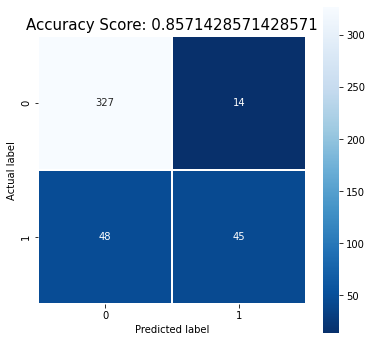

In [ ]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# Stepwise Regression (feature 3)




In [ ]:
#we make a new list without the feature we are already using 
#(which is Perfluoroundecanoic comment a.k.a binary detect or not)
include_3=list(X_train.drop(columns=['LBDBPBLC', 'LBDBSELC', 'LBDBMNLC','LBXPFNA','LBDPFUAL']).columns)

In [ ]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict_3= {}
loglik_dict_3= {}
causes_error_3=[]
#for loop for the second to include
for i in include_3:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train[['LBXPFNA','LBDPFUAL',i]]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict_3[i]=bic
    loglik_dict_3[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error_3.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.351174
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.357849
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.359925
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.358161
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.360005
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.352950
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.352100
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.357628
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.357220
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.359183
  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.359233
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.359479
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.359767
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.360095
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.359995
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.359956
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.356742
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.360118
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.360124
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.358340
         Iterations 9
Optimization ter

In [ ]:
causes_error_3

[]

In [ ]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
#this got annoying to change so made a function
def bic_loglik(bicdictionary,loglikedictionary):
  return list(bicdictionary.keys())[list(bicdictionary.values()).index(min(bicdictionary.values()))],min(bicdictionary.values()),loglikedictionary[list(loglik_dict_2.keys())[list(bicdictionary.values()).index(min(bicdictionary.values()))]]

In [ ]:
print(bic_loglik(bic_dict_3,loglik_dict_3))

('LBDVCBLC', 1210.0674552287169, -608.2168918728173)


In [ ]:
log_reg=sm.Logit(Y_train,X_train[['LBXPFNA','LBDPFUAL','LBDVCBLC']]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.347173
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               LBDPFDEL   No. Observations:                 1734
Model:                          Logit   Df Residuals:                     1731
Method:                           MLE   Df Model:                            2
Date:                Tue, 01 Mar 2022   Pseudo R-squ.:                  0.3223
Time:                        22:09:45   Log-Likelihood:                -602.00
converged:                       True   LL-Null:                       -888.36
Covariance Type:            nonrobust   LLR p-value:                4.318e-125
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LBXPFNA       -3.3192      0.321    -10.326      0.000      -3.949      -2.689
LBDPFUAL       3.1175      0.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train[['LBXPFNA','LBDPFUAL','LBDVCBLC']],Y_train)
prediction = model.predict(X_test[['LBXPFNA','LBDPFUAL','LBDVCBLC']])
score = model.score(X_test[['LBXPFNA','LBDPFUAL','LBDVCBLC']],Y_test)
print(score)

0.8571428571428571


In [ ]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[327  14]
 [ 48  45]]


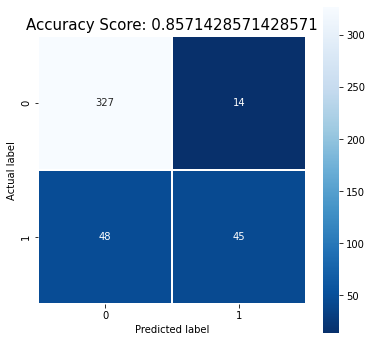

In [ ]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# Stepwise Regression (feature 4)




In [ ]:
#we make a new list without the feature we are already using 
#(which is Perfluoroundecanoic comment a.k.a binary detect or not)
include_4=list(X_train.drop(columns=['LBDBPBLC', 'LBDBSELC', 'LBDBMNLC','LBXPFNA','LBDPFUAL','LBDVCBLC']).columns)

In [ ]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict_3= {}
loglik_dict_3= {}
causes_error_3=[]
#for loop for the second to include
for i in include_3:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train[['LBXPFNA','LBDPFUAL',i]]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict_3[i]=bic
    loglik_dict_3[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error_3.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.347832
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.353833
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.355623
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.354083
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.355756
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.347803
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.348706
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.351216
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.354202
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.355015
  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.355746
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.354839
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.354530
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.353856
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.355474
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.355282
         Iterations 8
         Current function value: 0.354776
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.355462
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.355136
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.355752
         Iterations 9
Optimization ter

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Iterations 9
Optimization terminated successfully.
         Current function value: 0.352315
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.355688
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.355760
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.354886
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.355759
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.355683
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.355762
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.355575
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.355121
         Iterations 8
Optimization terminated successfully.
         Current funct

In [ ]:
causes_error_3

[]

In [ ]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
#this got annoying to change so made a function
def bic_loglik(bicdictionary,loglikedictionary):
  return list(bicdictionary.keys())[list(bicdictionary.values()).index(min(bicdictionary.values()))],min(bicdictionary.values()),loglikedictionary[list(loglik_dict_2.keys())[list(bicdictionary.values()).index(min(bicdictionary.values()))]]

In [ ]:
print(bic_loglik(bic_dict_3,loglik_dict_3))

('LBDVCBLC', 1210.0674552287169, -608.2168918728173)


In [ ]:
log_reg=sm.Logit(Y_train,X_train[['LBXPFNA','LBDPFUAL','LBDVCBLC']]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.347173
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               LBDPFDEL   No. Observations:                 1734
Model:                          Logit   Df Residuals:                     1731
Method:                           MLE   Df Model:                            2
Date:                Wed, 02 Mar 2022   Pseudo R-squ.:                  0.3223
Time:                        01:06:01   Log-Likelihood:                -602.00
converged:                       True   LL-Null:                       -888.36
Covariance Type:            nonrobust   LLR p-value:                4.318e-125
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LBXPFNA       -3.3192      0.321    -10.326      0.000      -3.949      -2.689
LBDPFUAL       3.1175      0.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train[['LBXPFNA','LBDPFUAL','LBDVCBLC']],Y_train)
prediction = model.predict(X_test[['LBXPFNA','LBDPFUAL','LBDVCBLC']])
score = model.score(X_test[['LBXPFNA','LBDPFUAL','LBDVCBLC']],Y_test)
print(score)

0.8571428571428571


In [ ]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[327  14]
 [ 48  45]]


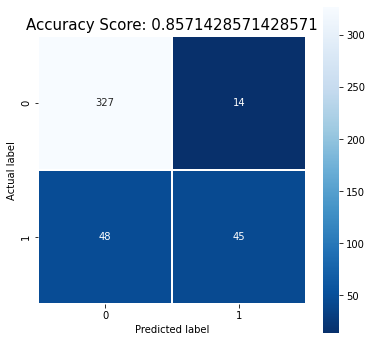

In [ ]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

#okay, now that we have this down, let's try forward stepwise regression using a loop instead of just one feature added at a time
#@anna, I couldn't get a loop that actually does it correctly. maybe you'll have better luck?
the issue: we are looking a loop within a loop, definitions of variables we create change depend on what loop in which we create/update them. we need to be able to for each time we add a new step in our regression, (the outlide loop), be able to look at everything in the inside loop (selection process for each feature addition), find the best one, and add it to the used list in a way that will save it in the outside loop. 


I tried to fix that by adding a placeholder i called min but it didn't help

In [ ]:
l1=[2,3,4,5]
l2=[6,7,8,9]
l1+l2

[2, 3, 4, 5, 6, 7, 8, 9]

# Below cell: Anna's attempt but ran into errors - singular matrices 

In [ ]:
# Anna tries loop 

#importing what we need
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
import math

#this is what we already know causes singular matrix issues
causes_errors=['LBDBPBLC', 'LBDBSELC', 'LBDBMNLC']

# ALGORITHM :
# include = list(X_train.drop(columns=causes_errors).columns)
# included = []     # empty list to track what's been included so far 
# while bic > prev_bic : 
  # for i in include :
    # included.append(include[i])
    # logreg = sm.Logit(Y_train, X_train[include]).fit
    # loglik = logreg.llf 
    # bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    # if bic < prev_bic:
      # break 
    # prev_bic = bic
prev_bic = 0

include = list(X_train.drop(columns=causes_errors).columns)
#include.remove('SEQN')
included = []     # empty list to track what's been included so far 
while bic > prev_bic:
  for i in include :
    included.append(i)
    print(included)
    logreg = sm.Logit(Y_train, X_train[included]).fit()
    loglik = logreg.llf
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    prev_bic = bic
    
print(included)

['SEQN']
Optimization terminated successfully.
         Current function value: 0.515542
         Iterations 4
['SEQN', 'LBXPFHS']
Optimization terminated successfully.
         Current function value: 0.489676
         Iterations 7
['SEQN', 'LBXPFHS', 'LBDPFHSL']
Optimization terminated successfully.
         Current function value: 0.484392
         Iterations 7
['SEQN', 'LBXPFHS', 'LBDPFHSL', 'LBXMPAH']
Optimization terminated successfully.
         Current function value: 0.480227
         Iterations 7
['SEQN', 'LBXPFHS', 'LBDPFHSL', 'LBXMPAH', 'LBDMPAHL']
Optimization terminated successfully.
         Current function value: 0.480166
         Iterations 7
['SEQN', 'LBXPFHS', 'LBDPFHSL', 'LBXMPAH', 'LBDMPAHL', 'LBXPFBS']
Optimization terminated successfully.
         Current function value: 0.479951
         Iterations 7
['SEQN', 'LBXPFHS', 'LBDPFHSL', 'LBXMPAH', 'LBDMPAHL', 'LBXPFBS', 'LBDPFBSL']
Optimization terminated successfully.
         Current function value: 0.479766
     

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.344035
         Iterations 13
['SEQN', 'LBXPFHS', 'LBDPFHSL', 'LBXMPAH', 'LBDMPAHL', 'LBXPFBS', 'LBDPFBSL', 'LBXPFHP', 'LBDPFHPL', 'LBXPFNA', 'LBDPFNAL', 'LBXPFUA', 'LBDPFUAL', 'LBXPFDO', 'LBDPFDOL', 'LBD2DFLC', 'LBD4CELC', 'LBDV06LC']
Optimization terminated successfully.
         Current function value: 0.343987
         Iterations 13
['SEQN', 'LBXPFHS', 'LBDPFHSL', 'LBXMPAH', 'LBDMPAHL', 'LBXPFBS', 'LBDPFBSL', 'LBXPFHP', 'LBDPFHPL', 'LBXPFNA', 'LBDPFNAL', 'LBXPFUA', 'LBDPFUAL', 'LBXPFDO', 'LBDPFDOL', 'LBD2DFLC', 'LBD4CELC', 'LBDV06LC', 'LBDV07LC']
Optimization terminated successfully.
         Current function value: 0.343121
         Iterations 13
['SEQN', 'LBXPFHS', 'LBDPFHSL', 'LBXMPAH', 'LBDMPAHL', 'LBXPFBS', 'LBDPFBSL', 'LBXPFHP', 'LBDPFHPL', 'LBXPFNA', 'LBDPFNAL', 'LBXPFUA', 'LBDPFUAL', 'LBXPFDO', 'LBDPFDOL', 'LBD2DFLC', 'LBD4CELC', 'LBDV06LC', 'LBDV07LC', 'LBDV08LC']
Optimization terminated successfully.

LinAlgError: ignored

Logistic Regression with the following variables: ['SEQN', 'LBXPFHS', 'LBDPFHSL', 'LBXMPAH', 'LBDMPAHL', 'LBXPFBS', 'LBDPFBSL', 'LBXPFHP', 'LBDPFHPL', 'LBXPFNA', 'LBDPFNAL', 'LBXPFUA', 'LBDPFUAL', 'LBXPFDO', 'LBDPFDOL', 'LBD2DFLC', 'LBD4CELC', 'LBDV06LC', 'LBDV07LC', 'LBDV08LC', 'LBDV1DLC', 'LBDV2ALC']


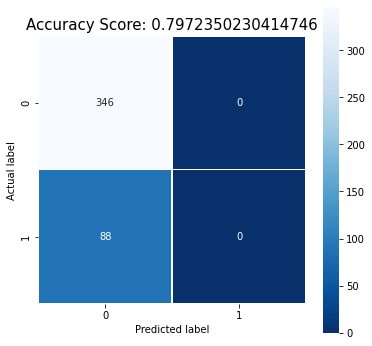

In [ ]:
# Anna loop continued 
# use 'included' list as variables in regression :

print('Logistic Regression with the following variables:', included)

model = LogisticRegression()
model.fit(X_train[included],Y_train)

#test the model
prediction = model.predict(X_test[included])
score = model.score(X_test[included],Y_test)
cm = metrics.confusion_matrix(Y_test, prediction)

# create plot of confusion matrix using seaborn 
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);



In [ ]:
#importing what we need
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
import math
#this is what we already know causes singular matrix issues
causes_errors=['LBDBPBLC', 'LBDBSELC', 'LBDBMNLC']
#this list will hold what is currently in the model
used=[]
#this list will hold the new score for the related number of features added
scores={}
new_score=0
score=0
j=0
#enter the number of features you want to try adding
no_feat=2
min=170000
while j<no_feat-1:
  for j in range(no_feat):
      if len(used)==0:
        #if it is the first iteration, we just want to remove what will cause errors
        include=list(X_train.drop(columns=causes_errors).columns)
      else:
        #past that, we will want to remove anything used so it doesn't add the same feature over and over again
        include=list(X_train.drop(columns=used+causes_errors).columns)
      bic_dict= {}
      loglik_dict= {}
      for i in include:
        try:
          log_reg=sm.Logit(Y_train,X_train[[used,i]]).fit()
          loglik =log_reg.llf
          #BIC calculation (math.log with one arguement is natural log)
          bic = (1 * math.log(len(Y_test))) - (2 * loglik)
          bic_dict[i]=bic
          loglik_dict[i]=loglik
          #the minimum BIC has to be constantly updated in this for loop because otherwise it will get overwritten when we want to later append it
          min=list(bic_dict.keys())[list(bic_dict.values()).index(min(bic_dict.values()))]
          if i is include[-1]:
            used.append(min)
        #if it causes an error we direct here  
        except:
          #the chemical is added to a list for this and then we move on to the next iteration
          causes_errors.append(i)
          pass
      #issue is that we want to append something that is defined within the smaller for loop, but becomes empty once outside that loop
      print(used)
      #print out summary
      #log_reg=sm.Logit(Y_train,X_train[used]).fit()
      #print(log_reg.summary())
      model = LogisticRegression()
      print(X_train[used])
      pass
      #####model.fit(X_train[used],Y_train)
      #test the model
      prediction = model.predict(X_test[used])
      new_score = model.score(X_test[used],Y_test)
      if new_score>=score:
        print(bic_loglik(bic_dict,loglik_dict))
        print(new_score)
        #confusion matrix
        cm = metrics.confusion_matrix(Y_test, prediction)
        # create plot of confusion matrix using seaborn 
        plt.figure(figsize=(6,6))
        sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
        plt.ylabel('Actual label');
        plt.xlabel('Predicted label');
        all_sample_title = 'Accuracy Score: {0}'.format(score)
        plt.title(all_sample_title, size = 15);
        scores[j]=new_score
        score=new_score





[]
Empty DataFrame
Columns: []
Index: [1010, 1796, 23, 2066, 1997, 1675, 88, 786, 640, 1768, 1498, 338, 2063, 167, 1497, 433, 792, 2087, 1830, 1107, 1222, 329, 264, 492, 2062, 1792, 1073, 817, 1902, 1021, 1380, 1946, 872, 110, 1739, 1361, 1019, 2082, 15, 474, 96, 769, 226, 1043, 137, 346, 918, 388, 224, 166, 1195, 1049, 1846, 1730, 906, 37, 2008, 518, 1035, 1215, 1331, 2067, 1814, 1489, 2116, 330, 1449, 1337, 464, 1803, 161, 1368, 942, 853, 1397, 413, 1686, 1226, 231, 1910, 757, 1755, 774, 569, 1561, 2020, 2072, 1326, 441, 1254, 1832, 94, 168, 490, 1763, 504, 1027, 1369, 129, 594, ...]

[1734 rows x 0 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


NotFittedError: ignored

# Let's run logistic Regression to predict one of the detection levels for a PFAS chemical

In [ ]:
# stepwise regression using statsmodels.api 
# method mostly from : https://towardsdatascience.com/stepwise-regression-tutorial-in-python-ebf7c782c922

import statsmodels.api as sm
# y predictor, x other cols 


'''
get_stats : takes as imput data frame of columns from df_predict
outputs Ordinary Least Squares 
want columns yielding p value (P > |t|) < 0.05
'''
def get_stats(x):
    if 'LBDPFDEL' in x.columns:
      x.drop('LBDPFDEL')
    if 'LBXPFDE' in x.columns:
      x.drop('LBXPFDE')
    y = df_predict['LBDPFDEL']
    results = sm.OLS(y, x).fit()
    print(results.summary())

x = df_predict
